In [25]:
%matplotlib inline
from modsim import *
import pandas as pd

In [26]:
from pandas import read_csv

import csv
results = TimeSeries()
filename_csv = "data/book1.csv"
tables = read_csv(filename_csv, header=0, index_col=0, decimal='.')
tables = tables.dropna()

type(tables)

pandas.core.frame.DataFrame

In [27]:
tables.columns = ['colonies']
num_col = tables.colonies
num_col[1974]
type(num_col)

pandas.core.series.Series

-36.046511627906973

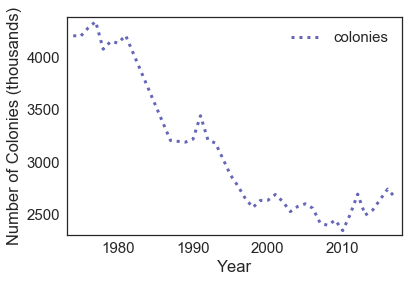

In [30]:
def plot_estimates(table):
   
    plot(table, ':', color='darkblue', label='colonies')
    
    decorate(xlabel='Year',
             ylabel='Number of Colonies (thousands)')


newfig()
plot_estimates(tables)


t0 = tables.index[0]
t_end = tables.index[-1]
p0 = num_col[t0]
p_end = num_col[t_end]
type(t0)
t0, t_end

total_growth = p_end - p0
elapsed_time = t_end - t0
annual_growth = total_growth / elapsed_time
annual_growth

In [48]:
def update_func2(num_col, year, system):
    """Compute the population next year.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    pop = num_col
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

results = System(alpha=.00001, beta=.00001)
update_func2(num_col, tables.index, results)

year
1974    4387.28310
1975    4382.94642
1976    4468.65510
1977    4534.92062
1978    4247.58642
1979    4327.68180
1980    4311.43740
1981    4390.53582
1987    3307.75230
1989    3291.79290
1990    3322.65180
1991    3561.57692
1992    3313.07310
1993    3282.21942
1994    3121.83930
1995    2958.74252
1996    2846.75670
1997    2718.14552
1998    2629.76660
1999    2700.24792
2000    2702.35322
2001    2760.28032
2002    2688.67020
2003    2587.73100
2004    2640.28050
2005    2666.57400
2006    2621.35692
2007    2471.24982
2008    2450.28842
2009    2502.70692
2010    2396.87306
2011    2560.42502
2012    2764.49556
2013    2553.07572
2014    2603.49060
2015    2709.72240
2016    2815.10340
2017    2730.78260
Name: colonies, dtype: float64

In [49]:
bees = System(t0 = tables.index[0], #start
t_end = tables.index[-1], #stop
p0 = num_col[first_year], #initial population
p_end = num_col[last_year], #final population
t = tables.index,
alpha=.00001, beta=.00001)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


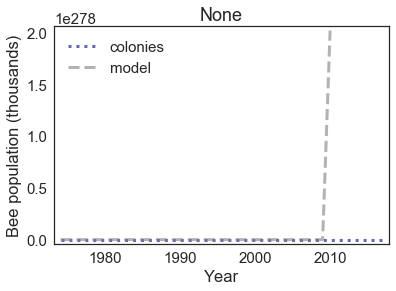

In [77]:
#quadratic
def update_func2(pop, t, system):
    """Compute the population next year.
   
    pop: current population
    t: current year
    system: system object containing parameters of the model
   
    returns: population next year
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth
 
def run_simulation(system, update_func):
    """Simulate the system using any update function.
   
    Adds TimeSeries to `system` as `results`.
 
    system: System object
    update_func: function that computes the population next year
    """
    results = TimeSeries()
    results[system.t0] = system.p0
    for t in linrange(system.t0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
    system.results = results
    
 
def plot_results(system, title=None):
    """Plot the estimates and the model.
   
    system: System object with `results`
    """
    newfig()
    plot_estimates(tables)
    plot(system.results, '--', color='gray', label='model')
    decorate(xlabel='Year',
             ylabel='Bee population (thousands)',
             title=title)
    
bees.alpha = 0.00001
bees.beta = 0.00001
run_simulation(bees, update_func2)
plot_results(bees)